# A notebook demonstrating kernel functions for Gaussian Processes

by Emily glover

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## Visualising covariance kernels:
Will add in future

## Interesting covariance kernels:

First, lets consider the following multivariate normal distribution with means 0 and covaraince matrix:

$$ k =\begin{bmatrix}
    1 & 0 & 0\\
    0 & 1 & 0 \\
    0 & 0 & 0 \\
    \end{bmatrix}$$
    
Clearly, we cannot draw samples from this distribution in the normal way, since the determinant of the covariance matrix is 0. The significance of this is that matrices with determinant equal to 0 are not invertible. As you will recall, the equation for the multivariate normal distribution is:

$$
f(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^k \lvert \boldsymbol{\Sigma} \rvert}} \exp\left(-\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu})\right)
$$

where $\Sigma$ is the covariance matrix and $\Sigma^{-1}$ is its inverse.

Let ignore this for now and pretend that we can generate samples the usual way and plot the distribution:

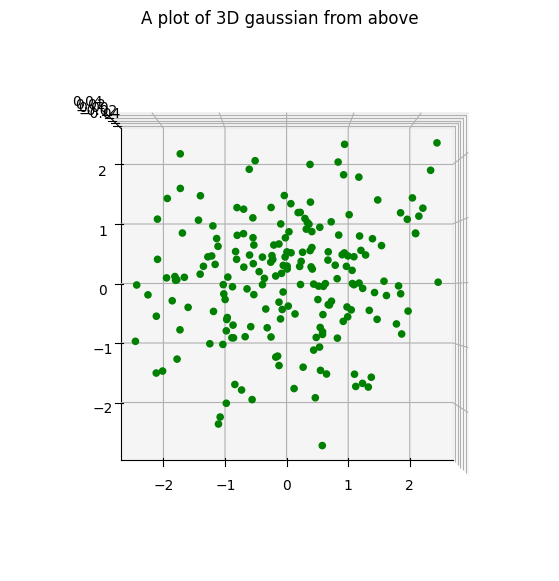

In [17]:
means = [0,0,0]
covariance = np.array([[1,0,0],[0,1,0],[0,0,0]])

samples = np.random.multivariate_normal(means, covariance, 200)
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(samples[:,0], samples[:,1], samples[:,2], color = "green")
ax.view_init(90, -90)
plt.title("A plot of 3D gaussian from above")
 
# show plot
plt.show()

As expected, we have a multivariate gaussian distribution which lies in a 3-dimensional space. Lets move on and take another look at the plot from another angle:

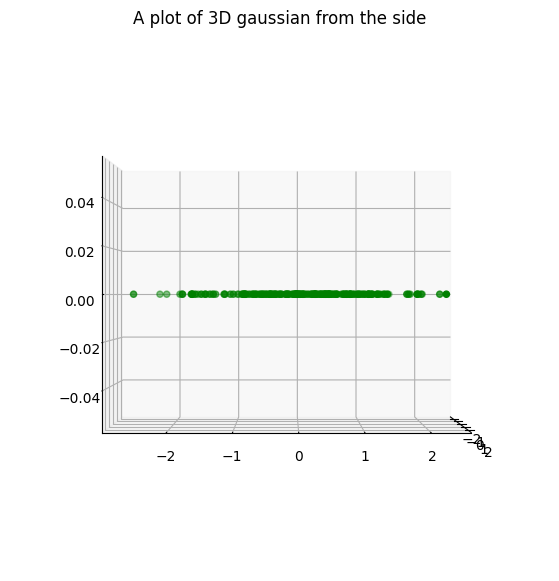

In [18]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 # Creating plot
ax.scatter3D(samples[:,0], samples[:,1], samples[:,2], color = "green")
ax.view_init(0, 0)
plt.title("A plot of 3D gaussian from the side")
 
# show plot
plt.show()

What we actually have in this plot is a 3d-Gaussian distribution where the value of the z-axis (3rd dimension) is always 0. As we will see throughout this noteboook, there are tricks which can be used which allow us generate samples in all cases where we have lower dimensional distributions in higer spaces. 

Since this is a very trivial example, we can very easily represent this dimension as a 2d-Gaussian without losing any information about the data in the distribution. i.e. by

$$ k =\begin{bmatrix}
    1 & 0\\
    0 & 1 \\
    \end{bmatrix}$$
    
Okay so this was an extremely trivial example right? We could see very easily from the matrix that this data always had the value 0 in the 3rd dimension. Lets make things a bit trickier. We transform the data by rotating it around the $x$ axis by 45 degrees. The rotation matrix is:

$$ R =\begin{bmatrix}
    1 & 0 & 0\\
    0 & \cos(45) & -sin(45) \\
    0 & \sin(45) & cos(45) \\
    \end{bmatrix}$$
    
We use it to transform all the "original samples" from our distribution to get the plot below:

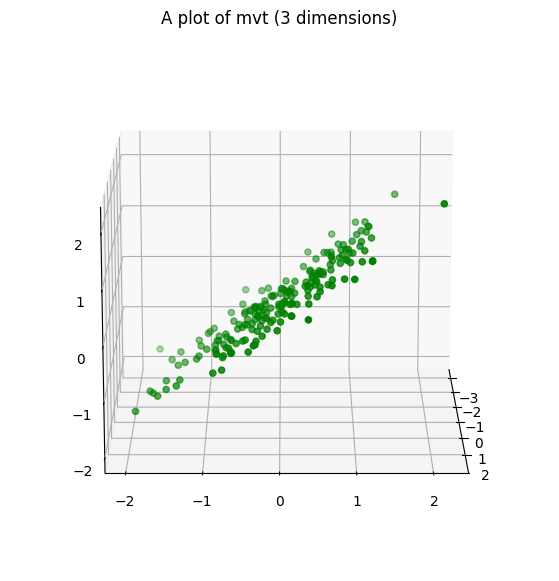

In [4]:
# Rotation around x axis by 45 degrees
R = np.array([[1, 0, 0],[0, np.cos(np.deg2rad(45)), -np.sin(np.deg2rad(45))],[0, np.sin(np.deg2rad(45)), np.cos(np.deg2rad(45))]])
new_samples = np.array([np.matmul(R,sample) for sample in samples])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(new_samples[:,0], new_samples[:,1], new_samples[:,2], color = "green")
ax.view_init(15, 0)
plt.title("A plot of mvt (3 dimensions)")
plt.show()

Note that to get the above plot, we simply just transformed each individual sample. We don't yet know its covariance matrix. Lets calculate it with numpy:

In [5]:
new_cov = np.cov(new_samples.T)
print(new_cov)

[[1.01796666 0.09739499 0.09739499]
 [0.09739499 0.56359587 0.56359587]
 [0.09739499 0.56359587 0.56359587]]


Now, imagine if I came to you and asked you to plot me a multivariate gaussian distribution with means 0 and covariance matrix equal to the one above. Unless you are familiar with the tricks outlined in this document, you would probably tell me i'm crazy and that it's not possible!

Why? 

Because similarly to the last case, the determinant of the covariance matrix is 0. However, this covariance matrix is way more complicated than the trivial one above. It's very difficult to understand what is actually happening in order to manually reduce the dimension. 

This document will outly the method in which we can reduce the dimension in order to generate samples from the orginal distribution. The key to this lies within Principle component analysis (PCA).

## Principle Component Analysis 

The overall goal of principle component analysis is to calculate the vectors which best represent the spread of variance from our distribution. We can simply do this by calculating the eigenvectors and eigenvalues of our covariance matrix. In other words, we are calculating new basis vectors such that the variance is spread in the same directions as the basis vectors. The eigenvalue in this case represents the magnitude of the basis vectors. I.e. if one eigenvalue is much bigger than the others, then the variance is spread more in the direction of its eigenvector. 

I WILL WRITE MORE HERE ONE DAY!!!

Lets calculate the eigenvalues and vectors of our new covariance matrix:

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(new_cov)

print("The eigenvalues are " + str(eigenvalues))
print("The eigenvectors are:")
print(eigenvectors)

The eigenvalues are [1.22074834e+00 9.24410053e-01 7.85046229e-17]
The eigenvectors are:
[[-5.61879718e-01 -8.27218945e-01 -2.87459906e-17]
 [-5.84932125e-01  3.97308959e-01 -7.07106781e-01]
 [-5.84932125e-01  3.97308959e-01  7.07106781e-01]]


Notice something interesting here?

Look at the value of the third eigenvalue... its 0!!!

This is the key to understanding distributions in lower dimensional spaces! Although our covariance matrix had variance and covariances greater than 0 across all 3 dimensions (when the dimensions were the standard x,y,z), when we shift the basis of our space to the eigenvectors, we see that there is 0 variance in the 3rd dimension. i.e the third coordinate of our multivarite gaussian is always 0 in this new basis. 

We can take advantage of this!

If the 3rd coordinate is always 0, then why not represent the gaussian as a 2d distribution instead?
Lets try it!

As previously mentioned, the eigenvectors represent the direction of the variance and the eigenvalues represent the magnitude of that variance. Therefore, by combining the eigenvectors and values, there is a way to calcuate the covariance matrix of a lower dimension. To compute the reduced-dimensional covariance matrix, denoted as $\boldsymbol{\Sigma}_r$, we can use the following formula:


$$
\boldsymbol{\Sigma}_r = \mathbf{U}_{:,1:r} \cdot \text{diag}(\boldsymbol{\lambda}_{1:r}) \cdot \mathbf{U}_{:,1:r}^T
$$

where:
- $\mathbf{U}_{:,1:r}$ represents the first $r$ columns of the matrix $\mathbf{U}$.
- $\text{diag}(\boldsymbol{\lambda}_{1:r})$ creates a diagonal matrix with the first $r$ eigenvalues.
- $\mathbf{U}_{:,1:r}^T$ denotes the transpose of the first $r$ columns of $\mathbf{U}$.

and where r is the rank of the original matrix. In this case, r=2 since the 3rd dimension had eigenvalue 0.

We calculate this below:

In [7]:
v_prime = eigenvectors[:, 0:2] # first 2 eigenvectors
eigenvals_matrix = np.diag(eigenvalues[:2]) # diagonal matrix of first 2 eigenvalues
temp = np.matmul(eigenvals_matrix,v_prime.T)
new_covariance_matrix = np.matmul(v_prime.T,temp.T)
print("The lower dimensional covariance matrix is: ")
print(new_covariance_matrix)

The lower dimensional covariance matrix is: 
[[1.22074834e+00 5.55111512e-16]
 [6.66133815e-16 9.24410053e-01]]


Wait a second...

We have seen this before, have we not?

Oh yes, its the covariance matrix we used initially when representing our data before we applied the rotation matrix transformation to the samples. By setting new basis vectors and reducing the dimension of the rotated matrix, we got back to the original 2D representation of our data!

But our data was originally in 3 dimensions and now we don't know the true distribution looked in the real world. How do we know what the angle of the rotation was?

Now, we can generate samples from the 2D distribution and transform them using the eigenvectors back to the original 3d distribution. 

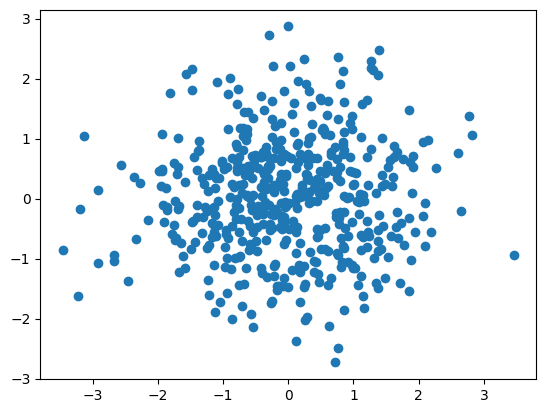

In [8]:
# Generate samples from new 2d dist

means = [0,0]
samples = np.random.multivariate_normal(means, new_covariance_matrix, 500)

plt.scatter(samples[:,0], samples[:,1])
plt.show()

And the transformed version:

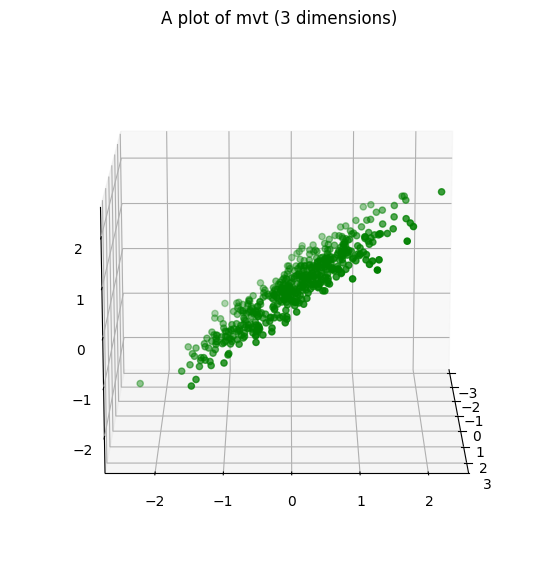

In [9]:
newsamples = np.array([np.matmul(sample, v_prime.T) for sample in samples])

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(newsamples[:,0], newsamples[:,1], newsamples[:,2], color = "green")
ax.view_init(15, 0)
plt.title("A plot of mvt (3 dimensions)")
plt.show()

And there we have it... The original distribution!

Recap:

So far, we have took samples from a 3D gaussian distribution where the covariance was singular. We did this by:
1) using pca to reduce the dimension
2) calculating a new low dimension covariance matrix
3) generating low dimensional samples from the new covariance matrix
4) scaling the low dimensional samples using the eigenvectors to get the original distribution

## How about the 2 dimensional case?

### A demonstration of $k(x,x') = x^{T} x$



Lets say we have covariance matrix:

$$ k =\begin{bmatrix}
    1 & 2\\
    2 & 4 \\
    \end{bmatrix}$$
    
Again, we cannot calculate the normal distribution the standard way, since we the matrix is singular. We must transform it to a lower dimension!

In [10]:
means = [0,0]
covariance = np.array([[1,2],[2,4]])

eigenvalues, eigenvectors = np.linalg.eig(covariance)

print("The eigenvalues are " + str(eigenvalues))
print("The corresponding eigenvectors are " + str(eigenvectors[:,0])+ ", "+str(eigenvectors[:,1]))

The eigenvalues are [0. 5.]
The corresponding eigenvectors are [-0.89442719  0.4472136 ], [-0.4472136  -0.89442719]


We see that there are two principal components of this data which makes sense considering its a 2-dimensional problem. The components act in the directions $[-0.89,-0.45]$ and $[-0.45,-0.89]$ with magnitudes $0$ and $5$. 

Taking the non-zero eigenvalues, $5$, we are left with a single eigenvector $[0.45,0.89]$. NOTE: Since we are considering the span of the eigenvector, we can flip it about the point $[0,0]$ i.e. take the the negative vector.

The reduced dimensional covariance matrix becomes:


$$\Sigma_r = [0.45,0.89]^T[5][0.45,0.89]$$

therefore, $\Sigma_r = 1.0125 + 3.9605 = 4.973$.

We now generate samples from a normal distribution with mean 0 and sd=$\Sigma_r$.

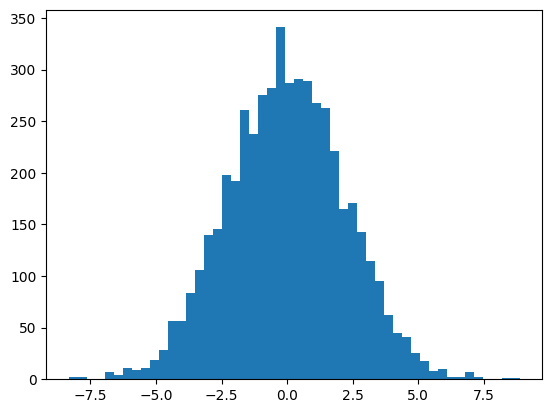

In [12]:
samples = np.random.normal(0, np.sqrt(4.973), 5000)

plt.hist(samples, bins = 50)
plt.show()

Now, we transform back up to the higher dimension by multiplying by the eigen vector!

(-6.0, 6.0)

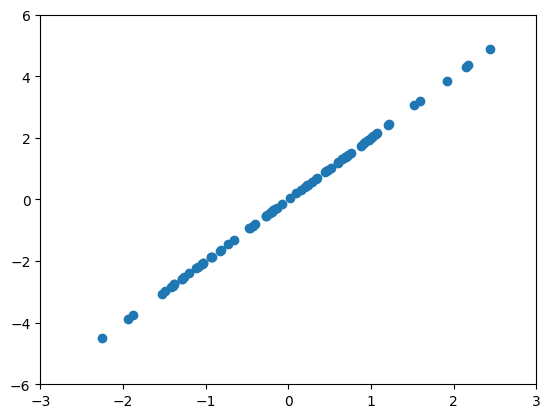

In [13]:
less_samples = np.random.normal(0, np.sqrt(4.973), 80) # in order to see samples on final scatter plot rather than solid line
v_prime = -eigenvectors[:, 1] # first 2 eigenvectors

new_samples = np.array([sample * v_prime for sample in less_samples])
plt.scatter(new_samples[:,0],new_samples[:,1])
plt.xlim([-3, 3])
plt.ylim([-6, 6])


We can compare this with the output from a direct multivariate normal function. The function is programmed to perform a similar method to this dimensionality reduction trick!

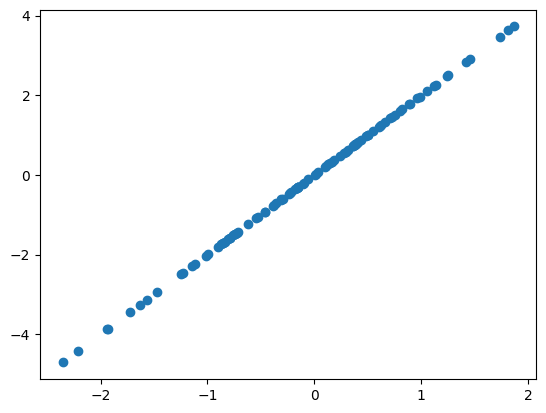

In [14]:
means = [0,0]
covariance = np.array([[1,2],[2,4]])
samples = np.random.multivariate_normal(means,covariance,100)
plt.scatter(samples[:,0],samples[:,1])
# show plot
plt.show()

And this is how we can sometimes calculate the gaussian distribution of singular covariance matrices!

There is something else happening here which makes this problem even more interesting. Lets consider what happens in the case 

$$ k =\begin{bmatrix}
    1 & 1.95\\
    1.95 & 4 \\
    \end{bmatrix}$$
    
This matrix is invertible but if the covariance increased to 2, we would have the previous situation. Lets plot this distribution the normal way:

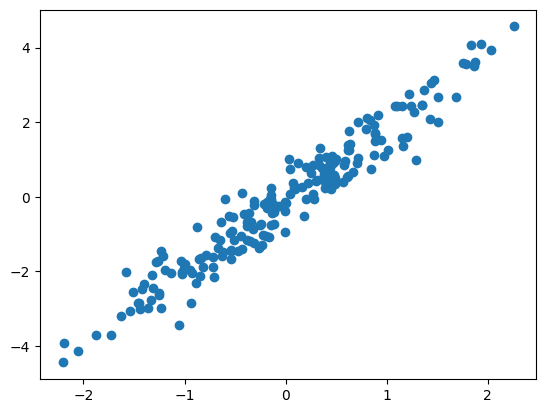

In [21]:
means = [0,0]
covariance = np.array([[1,1.95],[1.95,4]])
samples = np.random.multivariate_normal(means,covariance,200)
plt.scatter(samples[:,0],samples[:,1])

This distribution is almost equal to the last case but now there is some variance in the direction towards the top left and bottom right. Its almost as though we stretched the line out. Lets continue with our principal component analysis:

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)

print("The eigenvalues are " + str(eigenvalues))
print("The corresponding eigenvectors are " + str(eigenvectors[:,0])+ ", "+str(eigenvectors[:,1]))

The eigenvalues are [0.03981708 4.96018292]
The corresponding eigenvectors are [-0.89713733  0.44175176], [-0.44175176 -0.89713733]


Now, we dont have a 0 eigenvalue. This is because the variance happens in more than one direction. Lets translate this data to visualise it easier: 

NOTE: This isnt really the translation but its close enough for the example:

(-3.0, 3.0)

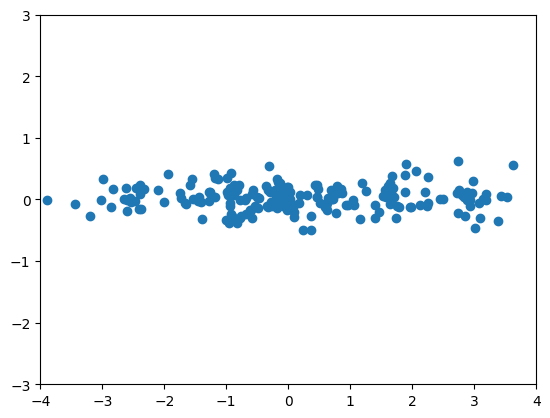

In [34]:
means = [0,0]
covariance = np.array([[4,0],[0,0.05]])
samples = np.random.multivariate_normal(means,covariance,200)
plt.scatter(samples[:,0],samples[:,1])
plt.xlim([-4, 4])
plt.ylim([-3, 3])

Now, we can see exactly what is happening. In the x direciton, the eigen value 4.95 represents a large spread of variance and in the y direction, the eigenvalue 0.04 represents a small spread of variance. This means that if we lower the dimension and increase it again, we are performing a lossy process. We get a similar distribution but we lose the variance in the y direction. See below:

(-3.0, 3.0)

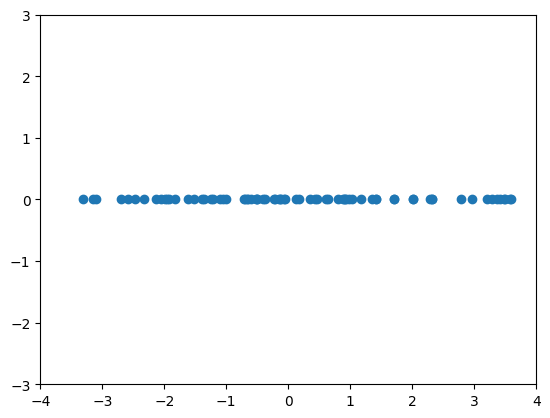

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(covariance)
less_samples = np.random.normal(0, np.sqrt(4.973), 80) # in order to see samples on final scatter plot rather than solid line
v_prime = -eigenvectors[:, 0] # first 2 eigenvectors
new_samples = np.array([sample * v_prime for sample in less_samples])
plt.scatter(new_samples[:,0],new_samples[:,1])
plt.xlim([-4, 4])
plt.ylim([-3, 3])

The above plot is the transformed 2D distribution but we lost some information in the process of transforming to a lower dimension and then increasing again. There is now no variance left in the y direction.


This is where things get really cool! When the covariance matrix is singular and has an eigenvalue of 0, there is no spread of the original distribution in the corresponding direction. I.e. the coordinate in that dimension is 0 for every sample. What this really means is that for the first few examples, there was never any data in the last dimension to begin with so we didnt lose anything during the conversion.

In the most recent example, the matrix wasn't singular, and there was no 0 eigenvalue, so the process was always lossy and we can never fully represent the original distribution by scaling down and up again.